# Outliers #

## Cosa sono gli Outliers?
### Gli Outliers, come dice il nome, sono dati che hanno comportamenti anomali rispetto alla maggior parte degli altri dati.
### Essi possono influenzare negativamente le statistiche ed infatti, in questa lezione, impareremo a gestirli

Librerie usate :

#### - Pandas ( pd ) > [importare, manipolare e analizzare dati, consente di eseguire operazioni come la selezione, il filtraggio, il raggruppamento e il calcolo di statistiche basati su Dataframe, cioè "tabelle".];
-
#### - Matplotlib.pyplot ( plt ) > [creare grafici e visualizzare dei dati in modo semplice. E' possibile generare diversi tipi di grafici, come a linee, istogrammi e scatter plot. Si può personalizzare l'aspetto dei grafici, aggiungere titoli, etichette degli assi e colori.];

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

Iniziamo

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

# Creiamo il Dataframe riferimento

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#crea un df di esempio
data = {'Valori': [1,2,3,4,5,10,20,25,300,1000,100000000,-50000000,-50]}
df = pd.DataFrame(data)
#lista con outliers da entrambi i lati
#calcola la media e la deviazione standard
mean_value = df['Valori'].mean()
std_dev = df ['Valori'].std() #.std() = deviazione standard
std_dev

32025617.551690556

### Questo codice crea un DataFrame di esempio utilizzando la libreria Pandas. Il DataFrame contiene una colonna chiamata "Valori" con una serie di numeri, alcuni dei quali potrebbero essere considerati outliers. Successivamente, il codice calcola la media e la deviazione standard dei valori presenti nella colonna "Valori". La deviazione standard viene quindi assegnata alla variabile std_dev

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

## Indentifichiamo la media di Outliers

In [6]:
# Identifica gli outliers considerando ±3 sigma dalla media
outliers = df[(df['Valori'] > mean_value + 3 * std_dev) | (df['Valori'] < mean_value - 3 * std_dev)] 
# " | " significa OR / Oppure
outliers

,Valori
10,100000000


### Questo codice identifica gli outliers all'interno del DataFrame df considerando i valori che si trovano al di fuori di ±3 deviazioni standard dalla media. Gli outliers vengono individuati utilizzando l'operatore logico |, che significa "OR", per selezionare i valori che sono superiori a mean_value + 3 * std_dev o inferiori a mean_value - 3 * std_dev. Infine, gli outliers identificati vengono restituiti come un nuovo DataFrame chiamato outliers.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

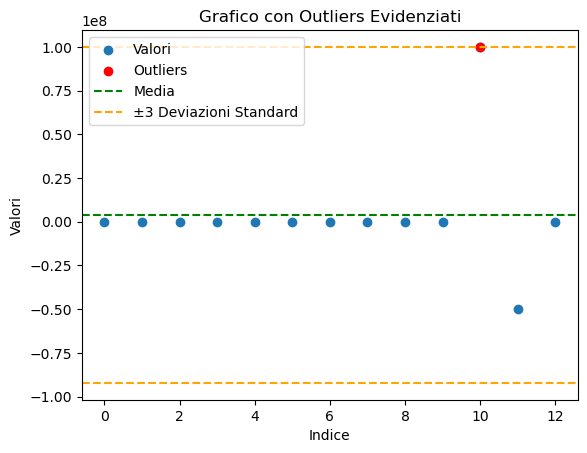

In [7]:
# Crea un grafico a dispersione
plt.scatter(df.index, df['Valori'], label='Valori')

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers['Valori'], color='red', label='Outliers')
## .index = accedere all'indice del dataframe

# Aggiungi la media e la deviazione standard al grafico 
## .axhline = linea orizzontale dentro il grafico
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()

### Questo codice crea un grafico a dispersione utilizzando i valori presenti nel DataFrame df. Successivamente, evidenzia gli outliers nel grafico con un colore diverso, mostrando i punti corrispondenti agli outliers individuati. Inoltre, aggiunge al grafico linee orizzontali per rappresentare la media e ±3 deviazioni standard dai valori. Infine, aggiunge etichette agli assi, un titolo e una legenda per il grafico, e lo mostra.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio con 4 features
data = {'Feature1': [1, 2000, 3, 4, 50000, 10, 15, 20, 2500000, 300000000, 100000000],
        'Feature2': [2, 4, 6, 8, 10, 20, 30, 40, 50000, 60, 200],
        'Feature3': [5, 10, 15, 20000, 25, 50, 75, 100, 125, 150, 500000],
        'Feature4': [1, -20000000, 3, 4000000000, 5, 10, 15, 20, 20005, 30, 10000]}

df = pd.DataFrame(data)

# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k=2 #intervallo di confidenza, cioè quante volte si deve aspettare un Outlier

# Lista per salvare gli indici degli outliers
outlier_indices = []

# Itera su ogni feature
for feature in df.columns:
    mean_value = df[feature].mean()
    std_dev = df[feature].std()
    
    # Identifica gli outliers per ciascuna feature
    df['Outlier_' + feature] = (df[feature] > mean_value + k * std_dev) | (df[feature] < mean_value - k * std_dev)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4
0,1,2,5,1,False,False,False,False
1,2000,4,10,-20000000,False,False,False,False
2,3,6,15,3,False,False,False,False
3,4,8,20000,4000000000,False,False,False,True
4,50000,10,25,5,False,False,False,False
5,10,20,50,10,False,False,False,False
6,15,30,75,15,False,False,False,False
7,20,40,100,20,False,False,False,False
8,2500000,50000,125,20005,False,True,False,False
9,300000000,60,150,30,True,False,False,False


### Questo codice crea un DataFrame di esempio con 4 features e definisce un numero minimo di features che devono superare una soglia per considerare un dato un outlier. Successivamente, identifica gli outliers per ciascuna feature calcolando la media e la deviazione standard di ogni feature e confrontando i valori con un intervallo di confidenza definito da k. Infine, aggiunge al DataFrame una nuova colonna per ciascuna feature indicando se il dato è un outlier o meno.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [9]:
# Calcola il numero di features che superano la soglia per ogni riga
df['Num_Outliers'] = df.filter(like='Outlier_').sum(axis=1)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers
0,1,2,5,1,False,False,False,False,0
1,2000,4,10,-20000000,False,False,False,False,0
2,3,6,15,3,False,False,False,False,0
3,4,8,20000,4000000000,False,False,False,True,1
4,50000,10,25,5,False,False,False,False,0
5,10,20,50,10,False,False,False,False,0
6,15,30,75,15,False,False,False,False,0
7,20,40,100,20,False,False,False,False,0
8,2500000,50000,125,20005,False,True,False,False,1
9,300000000,60,150,30,True,False,False,False,1


### Questo codice calcola il numero di features che superano la soglia per ogni riga del DataFrame. Utilizza il metodo filter() per selezionare le colonne del DataFrame che contengono la stringa 'Outlier_' nel nome, quindi somma il numero di valori True in ciascuna riga, indicando così il numero totale di features che superano la soglia per quella riga. Il risultato viene assegnato a una nuova colonna chiamata 'Num_Outliers' nel DataFrame.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [11]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers = df[df['Num_Outliers'] >= min_features_threshold]

# Aggiungi una colonna che indica se il record è un outlier o meno
df['Is_Outlier'] = df.index.isin(outliers.index)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers,Is_Outlier
0,1,2,5,1,False,False,False,False,0,False
1,2000,4,10,-20000000,False,False,False,False,0,False
2,3,6,15,3,False,False,False,False,0,False
3,4,8,20000,4000000000,False,False,False,True,1,True
4,50000,10,25,5,False,False,False,False,0,False
5,10,20,50,10,False,False,False,False,0,False
6,15,30,75,15,False,False,False,False,0,False
7,20,40,100,20,False,False,False,False,0,False
8,2500000,50000,125,20005,False,True,False,False,1,True
9,300000000,60,150,30,True,False,False,False,1,True


### Questo codice filtra il DataFrame per mantenere solo le righe che hanno almeno un numero minimo di features che superano la soglia. Successivamente, aggiunge una nuova colonna chiamata 'Is_Outlier' al DataFrame, che indica se ciascun record è un outlier o meno.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [12]:
# Calcola il numero di features che superano la soglia per ogni riga
df['Num_Outliers'] = df.filter(like='Outlier_').sum(axis=1) #axis 1 = somma valori righe per colonna

# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers = df[df['Num_Outliers'] >= min_features_threshold]

# Aggiungi una colonna che indica se il record è un outlier o meno
df['Is_Outlier'] = df.index.isin(outliers.index)

# Rimuovi colonne ausiliarie
df.drop(df.filter(like='Outlier_').columns, axis=1, inplace=True)
df.drop('Num_Outliers', axis=1, inplace=True) # inplace true = modifica il DataFrame originale
df

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,2000,4,10,-20000000,False
2,3,6,15,3,False
3,4,8,20000,4000000000,True
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False
8,2500000,50000,125,20005,True
9,300000000,60,150,30,True


### Questo codice calcola il numero di features che superano la soglia per ogni riga del DataFrame e lo salva nella colonna 'Num_Outliers'. Poi filtra il DataFrame per mantenere solo le righe con almeno il numero minimo di features superanti la soglia e aggiunge una colonna chiamata 'Is_Outlier' per indicare se ciascun record è un outlier o meno. Infine, rimuove le colonne ausiliarie utilizzate durante il processo di identificazione degli outliers.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

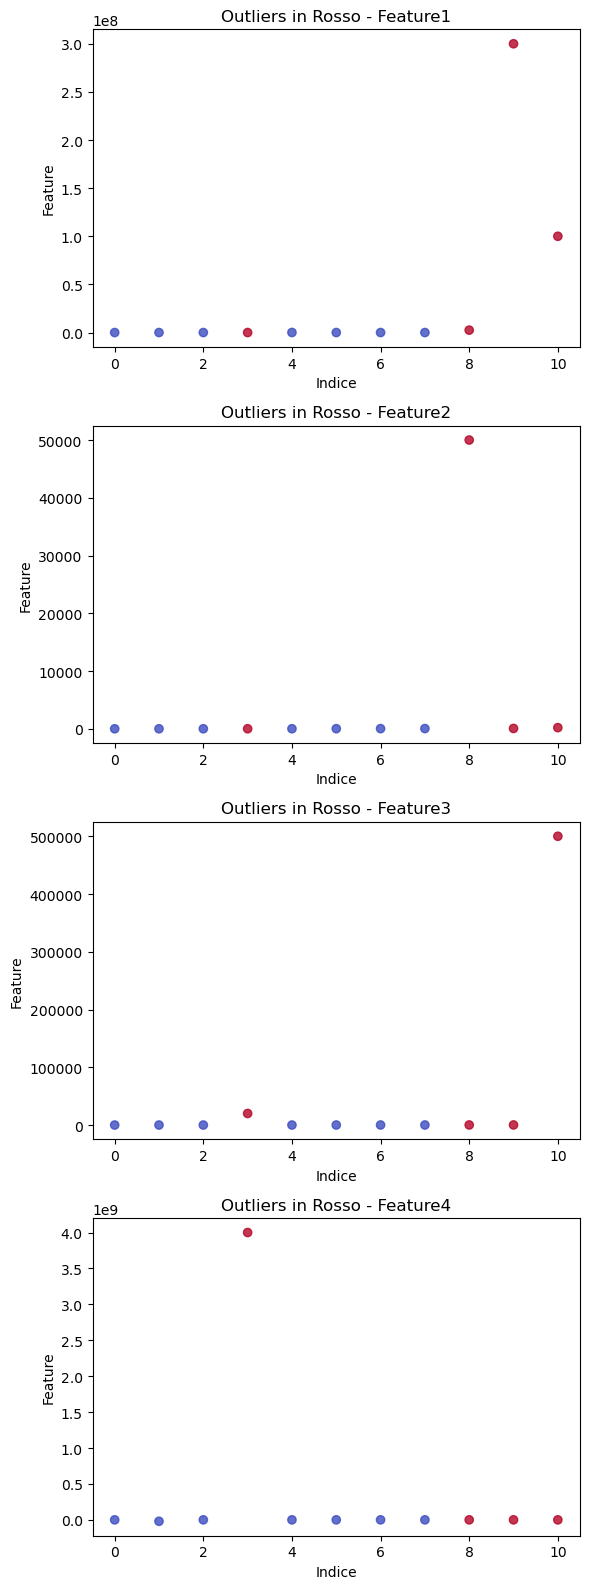

In [13]:
# Organizza i grafici in una matrice, con una colonna e 4 righe
num_features = len(df.columns) - 1  # Escludi la colonna 'Is_Outlier'
num_rows = num_features
num_cols = 1  # Una colonna

plt.figure(figsize=(6, 4 * num_rows))
for i, feature in enumerate(df.columns[:-1]):  # Escludi la colonna 'Is_Outlier'
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df.index, df[feature], c=df['Is_Outlier'], cmap='coolwarm', alpha=0.8)
    plt.title(f'Outliers in Rosso - {feature}')
    plt.xlabel('Indice')
    plt.ylabel('Feature')

plt.tight_layout()
plt.show()

### questo codice organizza i grafici in una matrice, con una colonna e 4 righe, dove ogni riga rappresenta una feature del DataFrame esclusa la colonna 'Is_Outlier'. Per ogni feature, viene generato un grafico a dispersione dove gli outliers sono evidenziati in rosso, mentre i valori normali sono colorati secondo una scala di colori. Il titolo di ciascun grafico include il nome della feature. Infine, i grafici vengono mostrati tutti insieme.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [14]:
# Elimina le righe corrispondenti agli outliers quelli che hanno almeno una features fuoriscala
df_filtered = df[df['Is_Outlier'] == False]
df_filtered

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,2000,4,10,-20000000,False
2,3,6,15,3,False
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False


### Questo codice elimina le righe corrispondenti agli outliers, cioè quelli che hanno almeno una feature fuori scala, e assegna il risultato a un nuovo DataFrame chiamato df_filtered. Le righe selezionate sono quelle dove il valore nella colonna 'Is_Outlier' è False, indicando che non sono outliers.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [16]:
# Organizza i grafici in una matricem con una colonna e 4 righe
num_features = len(df.columns) - 1 #Escludi la colonna 'Is_Outlier'
num_features

4

### Questo codice calcola il numero di features nel DataFrame, escludendo la colonna 'Is_Outlier', e assegna il risultato alla variabile num_features. La variabile num_features rappresenta quindi il numero totale di features nel DataFrame.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

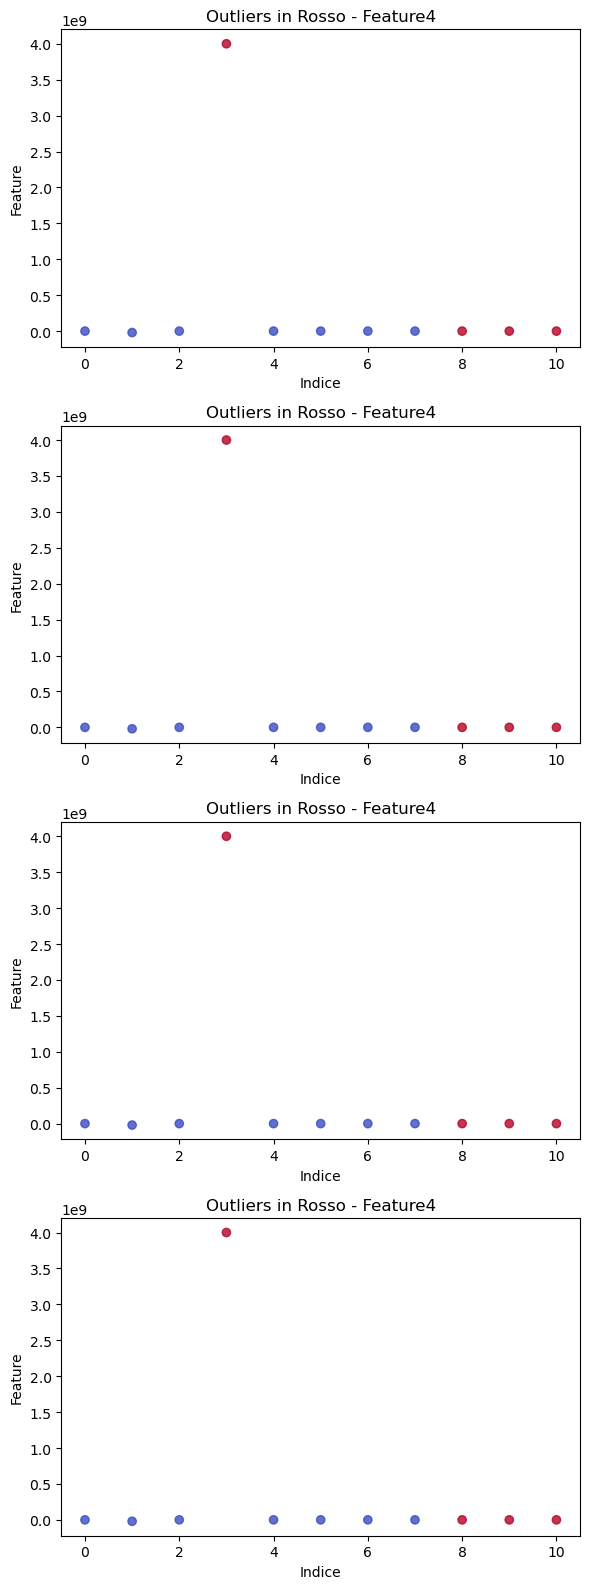

In [19]:
#qua non esclude la colonna 'Is_Outlier'
num_rows = num_features
num_cols = 1 #una colonna

plt.figure(figsize=(6, 4 * num_rows))
for i, features in enumerate(df.columns[:-1]): #escludi la colonna 'Is_Outlier'
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df.index, df[feature], c=df['Is_Outlier'], cmap='coolwarm', alpha = 0.8)
    plt.title(f'Outliers in Rosso - {feature}')
    plt.xlabel('Indice')
    plt.ylabel('Feature')

    
plt.tight_layout()
plt.show()

### Questo codice organizza i grafici in una matrice con una colonna e un numero di righe pari al numero di features presenti nel DataFrame, incluso anche la colonna 'Is_Outlier'. Successivamente, per ogni feature, viene generato un grafico a dispersione utilizzando gli indici del DataFrame sull'asse x e i valori della feature sull'asse y. Gli outliers sono evidenziati in rosso nel grafico, utilizzando la colonna 'Is_Outlier' per colorare i punti.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [21]:
# Elimina le righe corrispondenti agli outliers quelli che hanno almeno una features fuoriscala
df_filtered = df[df['Is_Outlier'] == False]
df_filtered

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,2000,4,10,-20000000,False
2,3,6,15,3,False
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False


### Questo codice elimina le righe del DataFrame che corrispondono agli outliers, ovvero quelle righe che hanno almeno una feature fuoriscala, identificata dalla colonna 'Is_Outlier' impostata su False. Il risultato è un nuovo DataFrame contenente solo le righe non considerate outliers.

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [23]:
def calcola_deviazione_standard(lista):
    n = len(lista)
    
    #calcola media
    media = sum(lista) / n
    
    #calcola la somma dei quadrati delle differenze dalla media
    somma_quadrati_diff = sum((x - media) ** 2 for x in lista)
    
    #calcola la dviazione standard
    deviazione_standard = (somma_quadrati_diff / n) ** 0.5
    
    return deviazione_standard

#esempio di utilizzo
numero_lista = [1,2,3,4,50]
deviazione_standard = calcola_deviazione_standard(numero_lista)

#stampa il risultato
print(f'la deviazione standard della lista è: {deviazione_standard}')

la deviazione standard della lista è: 19.026297590440446


### Questo codice definisce una funzione denominata calcola_deviazione_standard(lista) che accetta una lista di numeri come argomento e calcola la deviazione standard di quella lista. La deviazione standard è calcolata utilizzando la formula statistica standard. Viene quindi eseguito un esempio di utilizzo della funzione con una lista di numeri di esempio, e il risultato viene stampato a schermo.